In [1]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression,make_circles
import sys
from mpl_toolkits.mplot3d import Axes3D 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA,KernelPCA
np.random.seed(23)
np.set_printoptions(precision=3,suppress=True)
plt.style.use('seaborn')

from tensorflow.examples.tutorials.mnist import input_data

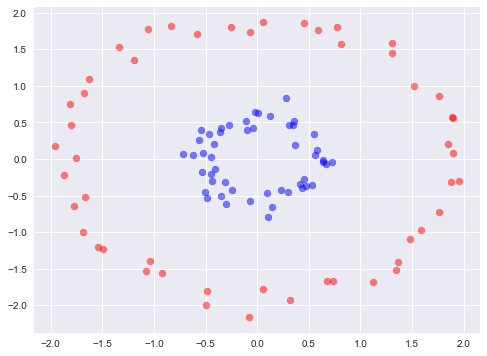

In [64]:
# See the data 
X, y = make_circles(n_samples=100, factor=.3, noise=.05)
# X = X @ np.array([[1,0],[1,2]])
# X,y = make_regression(n_samples=400, n_features=1,noise=5); X = np.concatenate((X,y[:,None]),1) 

# ======== WE ARE CENTERING AND STD =======
X[:,1] = -X[:,1]
X = (X - X.mean(0))/X.std(0)
# ======== WE ARE CENTERING AND STD =======

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
# plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

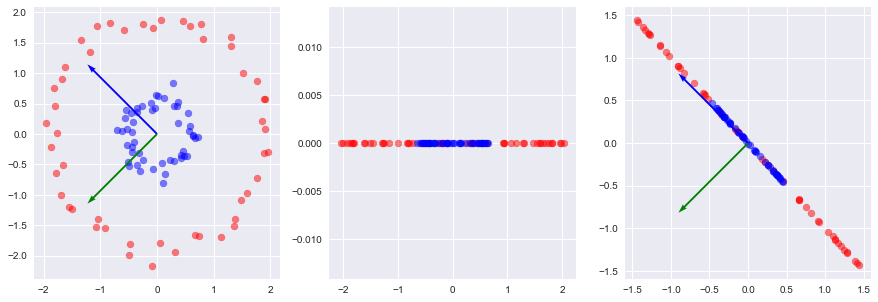

In [65]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[1]
evalue,evector = np.linalg.eig(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
projected = X @ evecs[:,0]
recovered = projected[:,None] @ evecs[:,0][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
# plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
# plt.scatter(projected,np.zeros(len(projected)), color='red', alpha=0.5)
plt.scatter(projected[y==0], np.zeros((len(projected)//2)), color='red', alpha=0.5)
plt.scatter(projected[y==1], np.zeros((len(projected)//2)), color='blue', alpha=0.5)


plt.subplot(1, 3, 3)
# plt.scatter(recovered[:, 0], recovered[:,1], color='red', alpha=0.5)
plt.scatter(recovered[y==0, 0], recovered[y==0, 1], color='red', alpha=0.5)
plt.scatter(recovered[y==1, 0], recovered[y==1, 1], color='blue', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

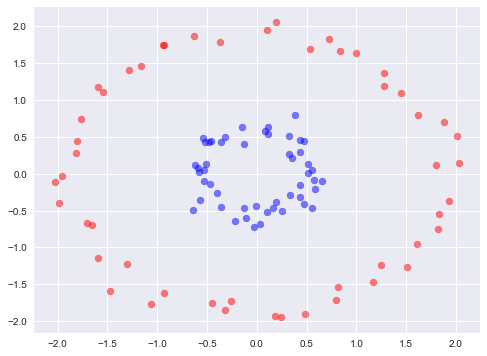

In [66]:
# PCA Sklearn 
one = PCA(n_components=2).fit_transform(X)
# plt.figure(figsize=(8,6))
# plt.scatter(one[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
# plt.scatter(one[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
# plt.show()

plt.figure(figsize=(8,6))
plt.scatter(one[y==0, 0], one[y==0, 1], color='red', alpha=0.5)
plt.scatter(one[y==1, 0], one[y==1, 1], color='blue', alpha=0.5)
plt.show()

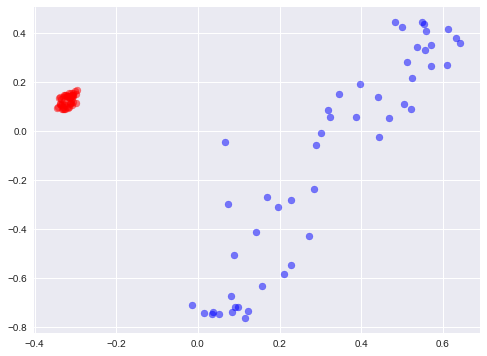

In [67]:
# PCA Sklearn 
dsad = KernelPCA(n_components=2,gamma=2, kernel="rbf").fit_transform(X)
# plt.figure(figsize=(8,6))
# plt.scatter(dsad[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
# plt.scatter(dsad[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
# plt.show()

plt.figure(figsize=(8,6))
plt.scatter(dsad[y==0, 0], dsad[y==0, 1], color='red', alpha=0.5)
plt.scatter(dsad[y==1, 0], dsad[y==1, 1], color='blue', alpha=0.5)
plt.show()

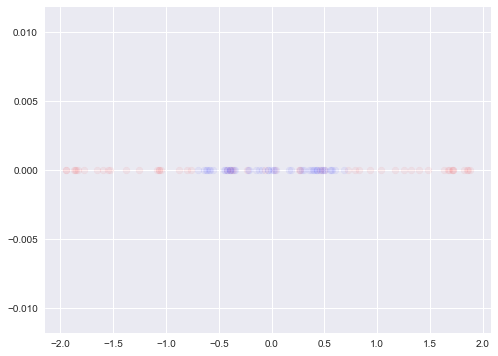

In [68]:
# PCA Sklearn 
fdsafds = LDA(n_components=1).fit_transform(X,y)
plt.figure(figsize=(8,6))
plt.scatter(fdsafds[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
plt.scatter(fdsafds[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
plt.show()

# plt.figure(figsize=(8,6))
# plt.scatter(fdsafds[y==0, 0], fdsafds[y==0, 1], color='red', alpha=0.5)
# plt.scatter(fdsafds[y==1, 0], fdsafds[y==1, 1], color='blue', alpha=0.5)
# plt.show()

In [69]:
#  act functions 
def g(x) :     return np.arctan(x)
def gg(x):     return np.tan(x)
def g_grad(x): return 1/(1+x**2)
def gg_grad(x):return 1/(np.cos(x)*2+1e-8)

In [286]:
class PCA_layer():

    def __init__(self,inc,outc,act=g,d_act=g_grad):
        #self.w =self.sym_decorrelation(np.random.normal(size=(inc,outc)))
        self.w =self.sym_decorrelation(np.random.beta(1,1,size=(inc,outc)))

        self.a =self.stand(np.random.normal(size=(outc)))
        self.b =self.stand(np.random.normal(size=(outc)))
        self.c =self.stand(np.random.normal(size=(outc)))
        
#         self.a =np.ones(outc)
#         self.b =np.ones(outc)
#         self.c =np.zeros(outc)

        self.act = act; self.d_act = d_act
        
        self.mw,self.vw = np.zeros_like(self.w),np.zeros_like(self.w)
        self.ma,self.va = np.zeros_like(self.a),np.zeros_like(self.a)
        self.mb,self.vb = np.zeros_like(self.b),np.zeros_like(self.b)
        self.mc,self.vc = np.zeros_like(self.c),np.zeros_like(self.c) 
    
    def feed_linear(self,input_value):
        self.input = input_value
        self.layer = self.input @ self.w
        var = self.w.T @ self.input.T @ self.input @ self.w
        return self.layer,var
    def back_linear(self):
        gradw     = -2*self.input.T @ self.input @ self.w 
        grad_pass = -2*self.input   @ self.w     @ self.w.T
        
        self.mw   = beta1 * self.mw + (1-beta1) * gradw
        self.vw   = beta2 * self.vw + (1-beta2) * gradw ** 2
        adam_midw = (self.mw / (1-beta1)) * learning_rate/(np.sqrt(self.vw/(1-beta2)) + adam_e)
        self.w    = self.sym_decorrelation(self.w - adam_midw) 
        return grad_pass
        
    def feed_non(self,input_value):
        self.input = input_value
        self.layer = self.input @ self.w 
        self.layerA= self.a * self.act(self.b * self.layer) + self.c
        var = self.w.T @ self.input.T @ self.input @ self.w
        return self.layerA,var
    def back_non(self,gradient):
        
        grada = (gradient * self.act(self.b * self.layer)).mean(0)
        gradb = (gradient * self.a * self.d_act(self.b * self.layer) * self.layer).mean(0)
        gradc = gradient.mean(0)
        
        gradw = self.input.T @(gradient * self.a * self.d_act(self.b * self.layer) * self.b) -2*self.input.T @ self.input @ self.w 
        grad_pass = (gradient * self.a * self.d_act(self.b * self.layer) * self.b)  @ self.w.T -2*self.input   @ self.w     @ self.w.T
        
#         gradw = self.input.T @(gradient * self.a * self.d_act(self.b * self.layer) * self.b) 
#         grad_pass = (gradient * self.a * self.d_act(self.b * self.layer) * self.b)  @ self.w.T 
        
        self.ma   = beta1 * self.ma + (1-beta1) * grada
        self.va   = beta2 * self.va + (1-beta2) * grada ** 2
        adam_mida = (self.ma / (1-beta1)) * learning_rate/(np.sqrt(self.va/(1-beta2)) + adam_e)
        self.a    = self.stand(self.a - adam_mida)
        
        self.mb   = beta1 * self.mb + (1-beta1) * gradb
        self.vb   = beta2 * self.vb + (1-beta2) * gradb ** 2
        adam_midb = (self.mb / (1-beta1)) * learning_rate/(np.sqrt(self.vb/(1-beta2)) + adam_e)
        self.b    = self.stand(self.b - adam_midb)      

        self.mc   = beta1 * self.mc + (1-beta1) * gradc
        self.vc   = beta2 * self.vc + (1-beta2) * gradc ** 2
        adam_midc = (self.mc / (1-beta1)) * learning_rate/(np.sqrt(self.vc/(1-beta2)) + adam_e)
        self.c    = self.stand(self.c - adam_midc)
        
        self.mw   = beta1 * self.mw + (1-beta1) * gradw
        self.vw   = beta2 * self.vw + (1-beta2) * gradw ** 2
        adam_midw = (self.mw / (1-beta1)) * learning_rate/(np.sqrt(self.vw/(1-beta2)) + adam_e)
        self.w    = self.sym_decorrelation(self.w - adam_midw)
        
        return grad_pass
    
#     def stand(self,a): return a
    def stand(self,a): return (a-a.mean())/a.std()
    def norm(self,w):  return w/(np.sqrt(np.sum(w**2)))
    
#     def sym_decorrelation(self,W): return W
    def sym_decorrelation(self,W):
        """ Symmetric decorrelation
        i.e. W <- (W * W.T) ^{-1/2} * W
        """
        s, u = np.linalg.eigh(np.dot(W, W.T))
        # u (resp. s) contains the eigenvectors (resp. square roots of
        # the eigenvalues) of W * W.T
        return np.dot(np.dot(u * (1./(np.sqrt(s+1e-8)+1e-8)), u.T), W)
    
# need to fix this later
class batch_norm():
    
    def __init__(self):
        pass
    def feed(self,x,eps=1e-8):
        
        N, D = x.shape

        #step1: calculate mean
        mu = 1./N * np.sum(x, axis = 0)

        #step2: subtract mean vector of every trainings example
        xmu = x - mu

        #step3: following the lower branch - calculation denominator
        sq = xmu ** 2

        #step4: calculate variance
        var = 1./N * np.sum(sq, axis = 0)

        #step5: add eps for numerical stability, then sqrt
        sqrtvar = np.sqrt(var + eps)

        #step6: invert sqrtwar
        ivar = 1./sqrtvar

        #step7: execute normalization
        xhat = xmu * ivar

        self.cache = (xhat,xmu,ivar,sqrtvar,var)

        return xhat
    def back(self,dout,eps=1e-8):
        xhat,xmu,ivar,sqrtvar,var = self.cache
        
        #get the dimensions of the input/output
        N,D = dout.shape

        #step9
        dgammax = dout #not necessary, but more understandable

        #step8
        dxhat = dgammax 

        #step7
        divar = np.sum(dxhat*xmu, axis=0)
        dxmu1 = dxhat * ivar

        #step6
        dsqrtvar = -1. /(sqrtvar**2) * divar

        #step5
        dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

        #step4
        dsq = 1. /N * np.ones((N,D)) * dvar

        #step3
        dxmu2 = 2 * xmu * dsq

        #step2
        dx1 = (dxmu1 + dxmu2)
        dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

        #step1
        dx2 = 1. /N * np.ones((N,D)) * dmu

        #step0
        dx = dx1 + dx2

        return dx

In [ ]:
learning_rate = 0.0008; beta1=0.0; beta2=0.0; adam_e = 1e-8 

l1 = PCA_layer(2,8)
l1b= batch_norm()
l2 = PCA_layer(8,4)
l2b= batch_norm()
l3 = PCA_layer(4,2)

mini_batch_size    = 100
training_iteration = 50

copyX = np.copy(X)
for iter in range(training_iteration):

    copyX = shuffle(copyX)
    for current_batch_index in range(0,len(X),mini_batch_size):
        current_batch = copyX[current_batch_index:current_batch_index+mini_batch_size]
        layer1,layer1_var = l1.feed_non(current_batch)
        layer1bn = l1b.feed(layer1)
        layer2,layer2_var = l2.feed_non(layer1bn)
        layer2bn = l2b.feed(layer2)
        layer3,layer3_var = l3.feed_linear(layer2bn)

        sys.stdout.write("Iter: " + str(iter) + " " + str(layer1_var.mean() + layer2_var.mean() + layer3_var.mean()) + '\r')
        sys.stdout.flush()
        
        grad3 = l3.back_linear()
        grad2bn = l2b.back(grad3)
        grad2 = l2.back_non(grad2bn)
        grad1bn = l1b.back(grad2)
        grad1 = l1.back_non(grad1bn)
   
layer1,layer1_var = l1.feed_non(X)
layer1bn = l1b.feed(layer1)
layer2,layer2_var = l2.feed_non(layer1bn)
layer2bn = l2b.feed(layer2)
layer3,layer3_var = l3.feed_linear(layer2bn)

plt.figure(figsize=(8,6))
plt.scatter(layer3[y==0, 0], layer3[y==0, 1], color='red', alpha=0.5)
plt.scatter(layer3[y==1, 0], layer3[y==1, 1], color='blue', alpha=0.5)
plt.show()

In [22]:
class batch_norm():
    
    def __init__(self):
        pass
    
    def feed(self,x,eps=1e-8):
        
        N, D = x.shape

        #step1: calculate mean
        mu = 1./N * np.sum(x, axis = 0)

        #step2: subtract mean vector of every trainings example
        xmu = x - mu

        #step3: following the lower branch - calculation denominator
        sq = xmu ** 2

        #step4: calculate variance
        var = 1./N * np.sum(sq, axis = 0)

        #step5: add eps for numerical stability, then sqrt
        sqrtvar = np.sqrt(var + eps)

        #step6: invert sqrtwar
        ivar = 1./sqrtvar

        #step7: execute normalization
        xhat = xmu * ivar

        self.cache = (xhat,xmu,ivar,sqrtvar,var)

        return xhat
    
    def back(self,dout,eps=1e-8):
        xhat,xmu,ivar,sqrtvar,var = self.cache
        
        #get the dimensions of the input/output
        N,D = dout.shape

        #step9
        dgammax = dout #not necessary, but more understandable

        #step8
        dxhat = dgammax 

        #step7
        divar = np.sum(dxhat*xmu, axis=0)
        dxmu1 = dxhat * ivar

        #step6
        dsqrtvar = -1. /(sqrtvar**2) * divar

        #step5
        dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

        #step4
        dsq = 1. /N * np.ones((N,D)) * dvar

        #step3
        dxmu2 = 2 * xmu * dsq

        #step2
        dx1 = (dxmu1 + dxmu2)
        dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

        #step1
        dx2 = 1. /N * np.ones((N,D)) * dmu

        #step0
        dx = dx1 + dx2

        return dx
    
def batchnorm_forward(x, eps=1e-8):

    N, D = x.shape

    #step1: calculate mean
    mu = 1./N * np.sum(x, axis = 0)

    #step2: subtract mean vector of every trainings example
    xmu = x - mu

    #step3: following the lower branch - calculation denominator
    sq = xmu ** 2

    #step4: calculate variance
    var = 1./N * np.sum(sq, axis = 0)

    #step5: add eps for numerical stability, then sqrt
    sqrtvar = np.sqrt(var + eps)

    #step6: invert sqrtwar
    ivar = 1./sqrtvar

    #step7: execute normalization
    xhat = xmu * ivar
    
    cache = (xhat,xmu,ivar,sqrtvar,var)

    return xhat,cache
def batchnorm_backward(dout, cache,eps=1e-8):

    #unfold the variables stored in cache
    xhat,xmu,ivar,sqrtvar,var = cache

    #get the dimensions of the input/output
    N,D = dout.shape

    #step9
    dgammax = dout #not necessary, but more understandable

    #step8
    dxhat = dgammax 

    #step7
    divar = np.sum(dxhat*xmu, axis=0)
    dxmu1 = dxhat * ivar

    #step6
    dsqrtvar = -1. /(sqrtvar**2) * divar

    #step5
    dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

    #step4
    dsq = 1. /N * np.ones((N,D)) * dvar

    #step3
    dxmu2 = 2 * xmu * dsq

    #step2
    dx1 = (dxmu1 + dxmu2)
    dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

    #step1
    dx2 = 1. /N * np.ones((N,D)) * dmu

    #step0
    dx = dx1 + dx2

    return dx


fdsafda = batch_norm()

tt = np.random.uniform(size=(100,2))
print(tt.mean(0),tt.std(0))
# tt,chca = batchnorm_forward(tt)
tt = fdsafda.feed(tt)
grad = fdsafda.back(np.ones_like(tt))
print(tt.mean(0),tt.std(0))
print(grad.mean())

[0.525 0.491] [0.3   0.255]
[ 0. -0.] [1. 1.]
3.785860513971784e-15


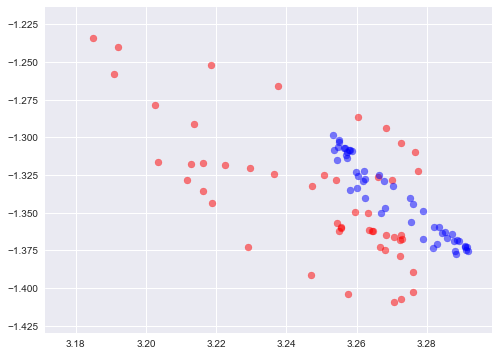

[[-0.279 -0.442 -0.777 -0.093  0.155  0.229 -0.189  0.045]
 [-0.05   0.266 -0.139 -0.23  -0.744  0.091 -0.248  0.481]]
[ 0.656 -1.638 -1.82   0.565  0.562  0.57   0.52   0.585]
[ 0.655 -1.638 -1.82   0.565  0.564  0.569  0.521  0.585]
[ 1.007  0.995 -1.021  1.003  0.993 -0.939 -1.028 -1.01 ]
[[-0.191 -0.042  0.641 -0.306]
 [-0.728 -0.285 -0.387  0.025]
 [ 0.518  0.017 -0.004 -0.114]
 [-0.008 -0.12   0.035  0.627]
 [-0.266 -0.109  0.507 -0.146]
 [ 0.201 -0.339 -0.36  -0.44 ]
 [-0.13   0.753 -0.061  0.181]
 [-0.193  0.457 -0.219 -0.502]]
[ 0.573 -1.732  0.572  0.588]
[ 0.574 -1.732  0.573  0.586]
[-0.999 -1.001  0.998  1.002]
[[-0.408  0.31 ]
 [-0.528 -0.025]
 [ 0.744  0.186]
 [ 0.027 -0.932]]


In [345]:
layer1,layer1_var = l1.feed_non(X)
layer2,layer2_var = l2.feed_non(layer1)
layer3,layer3_var = l3.feed_linear(layer2)
plt.figure(figsize=(8,6))
plt.scatter(layer3[y==0, 0], layer3[y==0, 1], color='red', alpha=0.5)
plt.scatter(layer3[y==1, 0], layer3[y==1, 1], color='blue', alpha=0.5)
plt.show()

print(l1.w)
print(l1.a)
print(l1.b)
print(l1.c)
print(l2.w)
print(l2.a)
print(l2.b)
print(l2.c)
print(l3.w)

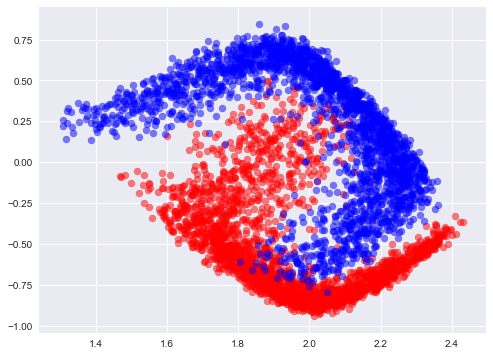

In [141]:
learning_rate = 0.00000008; beta1=0.9; beta2=0.999; adam_e = 1e-8 

l1 = PCA_layer(2,3)
l2 = PCA_layer(3,3)
l3 = PCA_layer(3,2)

mini_batch_size = 100
training_iteration = 400
for iter in range(training_iteration):

    for current_batch_index in range(0,len(X),mini_batch_size):
        current_batch = X[current_batch_index:current_batch_index+mini_batch_size]
        layer1,layer1_var = l1.feed_non(current_batch)
        layer2,layer2_var = l2.feed_non(layer1)
        layer3,layer3_var = l3.feed_linear(layer2)

        if iter%(training_iteration/10)==0: 
            print(layer1_var.mean() + layer2_var.mean() + layer3_var.mean(),end='\r')

        grad3 = l3.back_linear()
        grad2 = l2.back_non(grad3)
        grad1 = l1.back_non(grad2)

        
layer1,layer1_var = l1.feed_non(X)
layer2,layer2_var = l2.feed_non(layer1)
layer3,layer3_var = l3.feed_linear(layer2)
plt.figure(figsize=(8,6))
plt.scatter(layer3[y==0, 0], layer3[y==0, 1], color='red', alpha=0.5)
plt.scatter(layer3[y==1, 0], layer3[y==1, 1], color='blue', alpha=0.5)
plt.show()

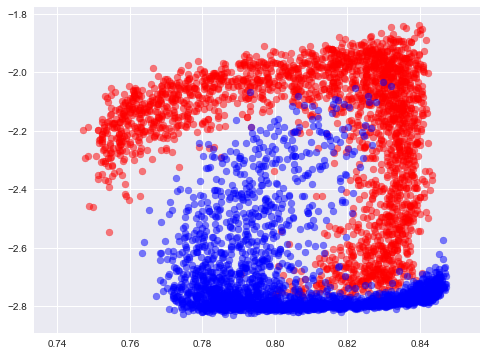

In [143]:
learning_rate = 0.00008; beta1=0.9; beta2=0.999; adam_e = 1e-8 

l1 = PCA_layer(2,3)
l2 = PCA_layer(3,3)
l3 = PCA_layer(3,3)
l4 = PCA_layer(3,3)
l5 = PCA_layer(3,2)


mini_batch_size = 100
training_iteration = 400
for iter in range(training_iteration):

    for current_batch_index in range(0,len(X),mini_batch_size):
        current_batch = X[current_batch_index:current_batch_index+mini_batch_size]
        layer1,layer1_var = l1.feed_non(current_batch)
        layer2,layer2_var = l2.feed_non(layer1)
        layer3,layer3_var = l3.feed_non(layer2)
        layer4,layer4_var = l4.feed_non(layer3)
        layer5,layer5_var = l5.feed_linear(layer4)

        if iter%(training_iteration/10)==0: 
            print(layer1_var.mean() + layer2_var.mean() + layer3_var.mean(),end='\r')

        grad5 = l5.back_linear()
        grad4 = l4.back_non(grad5)
        grad3 = l3.back_non(grad4)
        grad2 = l2.back_non(grad3)
        grad1 = l1.back_non(grad2)

        
layer1,layer1_var = l1.feed_non(X)
layer2,layer2_var = l2.feed_non(layer1)
layer3,layer3_var = l3.feed_non(layer2)
layer4,layer4_var = l4.feed_non(layer3)
layer5,layer5_var = l5.feed_linear(layer4)
plt.figure(figsize=(8,6))
plt.scatter(layer3[y==0, 0], layer3[y==0, 1], color='red', alpha=0.5)
plt.scatter(layer3[y==1, 0], layer3[y==1, 1], color='blue', alpha=0.5)
plt.show()

Iter :  0  Loss:  814.4994660948967
Iter :  500  Loss:  285.589287257039
Iter :  1000  Loss:  409.18845094236207
Iter :  1500  Loss:  418.03952176775783


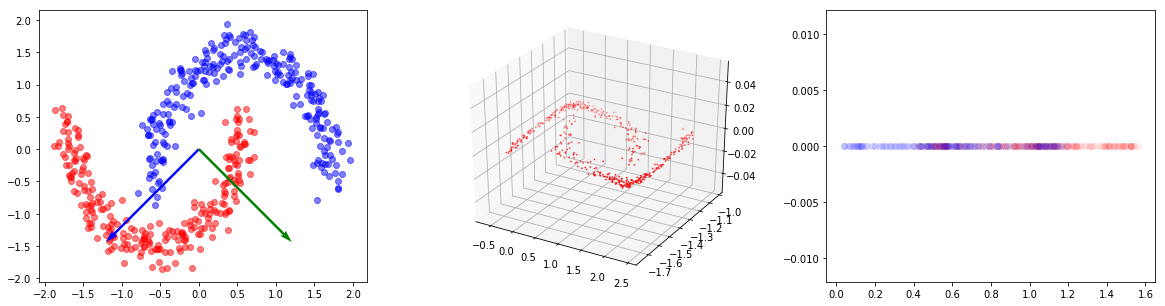

In [151]:
# with all scale
expand_dim = 3
w1 = np.random.randn(2,expand_dim)
w2 = np.random.randn(expand_dim,1)
a  = np.ones(expand_dim); b = np.ones(expand_dim); c = np.zeros(expand_dim)
w1 = _sym_decorrelation(w1)
w2 = w2/(np.sqrt(np.sum(w2**2)))

temp_X = np.copy(X)
mini_batch_size = 10
for iter in range(2000):
    cum_loss = 0; temp_X   = shuffle(temp_X)
    
    for mini_batch in range(0,len(X),mini_batch_size):
        current_batch = temp_X[mini_batch:mini_batch+mini_batch_size]
        
        layer1  = current_batch @ w1
        layer1a = a*g(b*layer1)+c
        layer2  = layer1a       @ w2
        loss    = (w2.T @ layer1a.T @ layer1a @ w2).mean() + (w1.T @ current_batch.T @ current_batch @ w1).mean()
        
        grad2 = -2*layer1a.T @ layer1a @ w2 
        grad1a= -2*layer1a@w2@w2.T
        
        grada = grad1a*g(b*layer1)
        gradb = grad1a*a*g_grad(b*layer1)*layer1
        gradc = grad1a
        grad1 = current_batch.T @(grad1a*a*g_grad(b*layer1)*b) - 2*current_batch.T @ current_batch @ w1 

        w2 = w2 - 0.000000001  * grad2+ (1/(iter+1))*np.random.randn(expand_dim,1)
        a = a -   0.0000009    * grada.mean(0)+ (1/(iter+1))*np.random.randn(expand_dim)
        b = b -   0.0000009    * gradb.mean(0)+ (1/(iter+1))*np.random.randn(expand_dim)
        c = c -   0.00000009   * gradc.mean(0) + (1/(iter+1))*np.random.randn(expand_dim)
        w1 = w1 - 0.000000001  * grad1+ (1/(iter+1))*np.random.randn(2,expand_dim)
        
        w1 = _sym_decorrelation(w1)
        w2 = w2/(np.sqrt(np.sum(w2**2)))
        a  = (a-a.mean())/a.std()
        b  = (b-b.mean())/b.std()
        c  = (c-c.mean())/c.std()
        cum_loss      = cum_loss + loss.mean()
        
    if iter%500==0:print('Iter : ',iter," Loss: ",cum_loss)

# projection
projected_mine = (a*g(b*(X @ w1))+c) @ w2

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2,projection='3d')
one_layer_project = (a*g(b*(X @ w1))+c)
plt.scatter(one_layer_project[:,0],one_layer_project[:,1],one_layer_project[:,2], color='red')

plt.subplot(1, 3, 3)
plt.scatter(projected_mine[y==0], np.zeros((len(projected_mine)//2)),  color='red', alpha=0.05)
plt.scatter(projected_mine[y==1], np.zeros((len(projected_mine)//2)), color='blue', alpha=0.05)
plt.show()

trace1 = go.Scatter3d(
    x=one_layer_project[y==0,0],
    y=one_layer_project[y==0,1],
    z=one_layer_project[y==0,2],
    mode='markers',
    line=dict(color='red',width=0.5),
    marker=dict(size=3,opacity=0.3)
)
trace2 = go.Scatter3d(
    x=one_layer_project[y==1,0],
    y=one_layer_project[y==1,1],
    z=one_layer_project[y==1,2],
    mode='markers',
    line=dict(color='blue',width=0.5),
    marker=dict(size=3,opacity=0.3)
)
data = [trace1,trace2]
fig  = go.Figure(data=data)
iplot(fig)

Iter :  0  Loss:  26892.082340902663
Iter :  500  Loss:  41934.236879577045
Iter :  1000  Loss:  41472.30452563819
Iter :  1500  Loss:  42011.58740363735


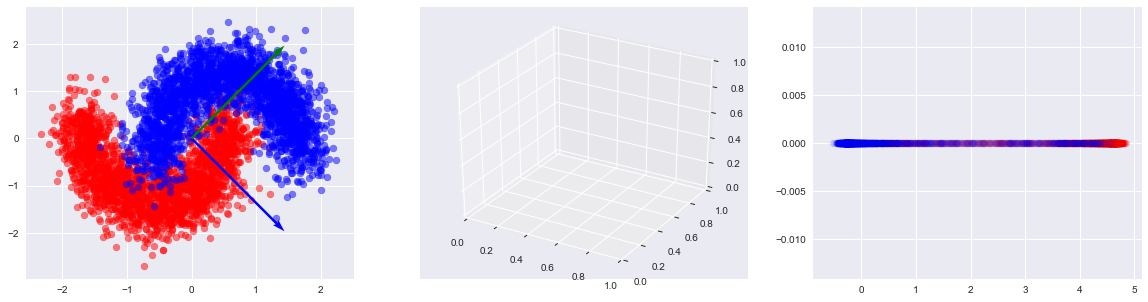

In [9]:
# with all scale
expand_dim = 5
w1 = np.random.randn(2,expand_dim)
m1 = np.zeros_like(w1)
w2 = np.random.randn(expand_dim,1)
m2 = np.zeros_like(w2)

a  = np.ones(expand_dim); 
ma = np.zeros_like(a)
b  = np.ones(expand_dim); 
mb = np.zeros_like(b)
c  = np.zeros(expand_dim)
mc = np.zeros_like(c)

w1 = _sym_decorrelation(w1)
w2 = w2/(np.sqrt(np.sum(w2**2))+1e-8)

temp_X = np.copy(X); mini_batch_size = 10

for iter in range(2000):
    cum_loss = 0; temp_X   = shuffle(temp_X)
    
    for mini_batch in range(0,len(X),mini_batch_size):
        current_batch = temp_X[mini_batch:mini_batch+mini_batch_size]
        
        layer1  = current_batch @ w1 + np.random.randn(mini_batch_size,expand_dim)
        layer1a = a*g(b*layer1)+c
        layer2  = layer1a       @ w2 + np.random.randn(mini_batch_size,expand_dim)
        loss    = (w2.T @ layer1a.T @ layer1a @ w2).mean() + (w1.T @ current_batch.T @ current_batch @ w1).mean()
        
        grad2 = -2*layer1a.T@layer1a @ w2 
        grad1a= -2*layer1a@w2@w2.T
        grada = grad1a*g(b*layer1)
        gradb = grad1a*a*g_grad(b*layer1)*layer1
        gradc = grad1a
        grad1 = current_batch.T @(grad1a*a*g_grad(b*layer1)*b) - 2*current_batch.T @ current_batch @ w1 
        
        m2 = m2 + 0.9*grad2
        w2 = w2 - 0.000001  * m2 
        
        ma = ma + 0.9*grada
        a  = a -   0.00009   * ma.mean(0)
        
        mb = mb + 0.9*gradb
        b  = b -   0.00009   * mb.mean(0) 
        
        mc = mc + 0.9*gradc
        c  = c -   0.00009   * mc.mean(0) 
        
        m1 = m1 + 0.9*grad1
        w1 = w1 - 0.000001  * m1 
        
        w1 = _sym_decorrelation(w1)
        w2 = w2/(np.sqrt(np.sum(w2**2)+1e-8))
        a  = (a-a.mean())/a.std()
        b  = (b-b.mean())/b.std()
        c  = (c-c.mean())/c.std()
        cum_loss = cum_loss + loss.mean()
        
    if iter%500==0:print('Iter : ',iter," Loss: ",cum_loss)

# projection
projected_mine = (a*g(b*(X @ w1))+c) @ w2

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2,projection='3d')
one_layer_project = (a*g(b*(X @ w1))+c)
# plt.scatter(one_layer_project[:,0],one_layer_project[:,1],one_layer_project[:,2], color='red')

plt.subplot(1, 3, 3)
plt.scatter(projected_mine[y==0], np.zeros((len(projected_mine)//2)),  color='red', alpha=0.05)
plt.scatter(projected_mine[y==1], np.zeros((len(projected_mine)//2)), color='blue', alpha=0.05)
plt.show()

# trace1 = go.Scatter3d(
#     x=one_layer_project[y==0,0],
#     y=one_layer_project[y==0,1],
#     z=one_layer_project[y==0,2],
#     mode='markers',
#     line=dict(color='red',width=0.5),
#     marker=dict(size=3,opacity=0.3)
# )
# trace2 = go.Scatter3d(
#     x=one_layer_project[y==1,0],
#     y=one_layer_project[y==1,1],
#     z=one_layer_project[y==1,2],
#     mode='markers',
#     line=dict(color='blue',width=0.5),
#     marker=dict(size=3,opacity=0.3)
# )
# data = [trace1,trace2]
# fig  = go.Figure(data=data)
# iplot(fig)

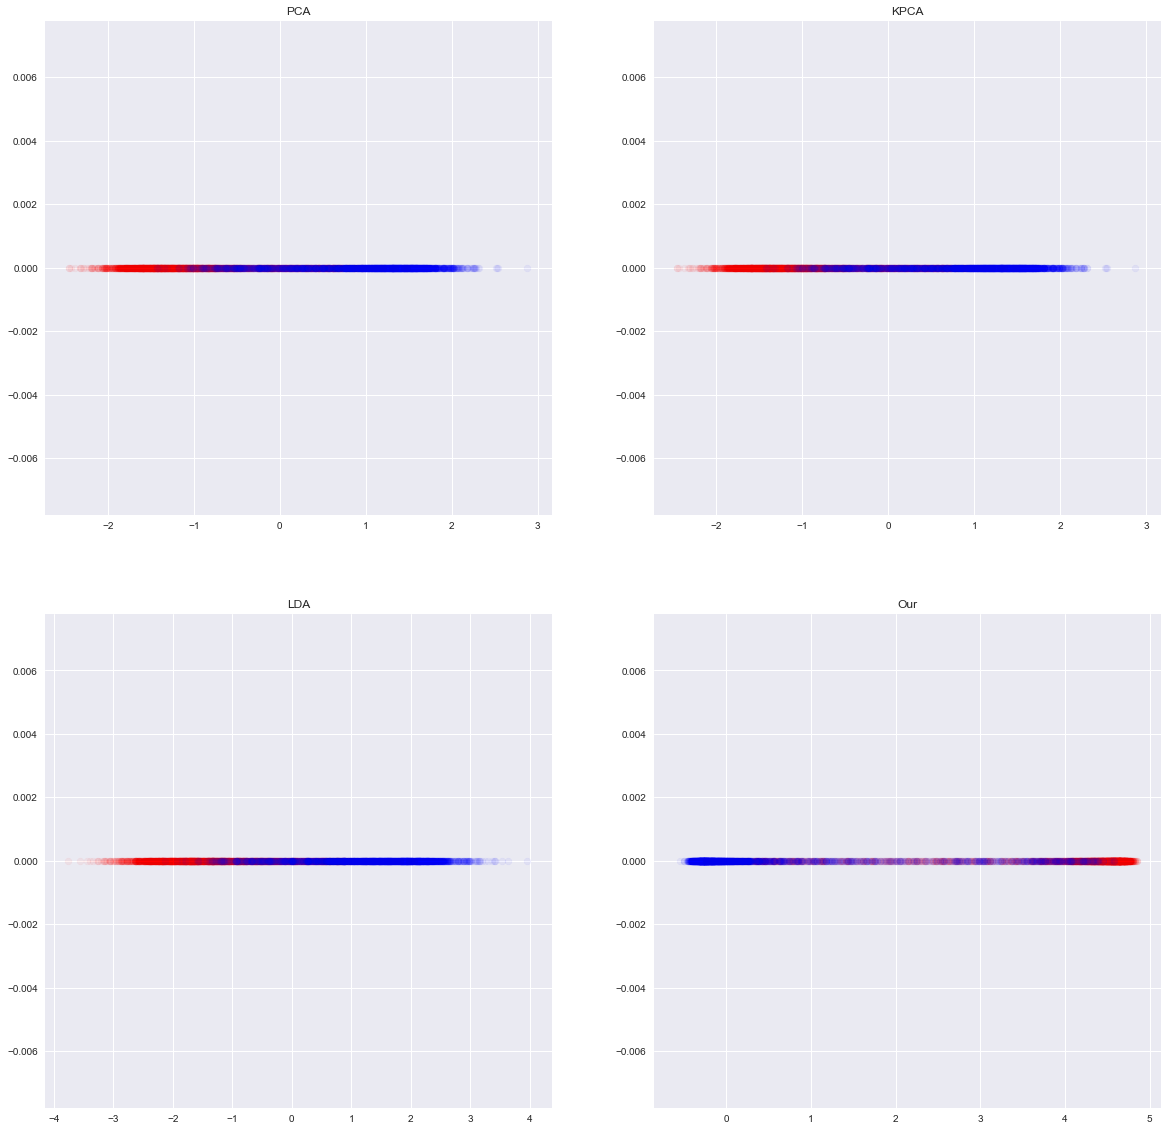

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.scatter(one[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
plt.scatter(one[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
plt.title('PCA')

plt.subplot(222)
plt.scatter(dsad[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
plt.scatter(dsad[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
plt.title('KPCA')

plt.subplot(223)
plt.scatter(fdsafds[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
plt.scatter(fdsafds[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
plt.title('LDA')

plt.subplot(224)
plt.scatter(projected_mine[y==0], np.zeros((len(one)//2)),  color='red', alpha=0.05)
plt.scatter(projected_mine[y==1], np.zeros((len(one)//2)), color='blue', alpha=0.05)
plt.title('Our')

plt.show()

In [250]:
# with all scale
expand_dim = 3
w1 = np.random.randn(2,expand_dim)
w2 = np.random.randn(expand_dim,expand_dim)
w3 = np.random.randn(expand_dim,1)

a1  = np.ones(expand_dim); 
b1  = np.ones(expand_dim); 
c1  = np.zeros(expand_dim)

a2  = np.ones(expand_dim); 
b2  = np.ones(expand_dim); 
c2  = np.zeros(expand_dim)

w1 = _sym_decorrelation(w1)
w2 = _sym_decorrelation(w2)
w3 = w3/(np.sqrt(np.sum(w3**2))+1e-8)


temp_X = np.copy(X); mini_batch_size = 10

for iter in range(2000):
    cum_loss = 0; temp_X   = shuffle(temp_X)
    
    for mini_batch in range(0,len(X),mini_batch_size):
        current_batch = temp_X[mini_batch:mini_batch+mini_batch_size]
        
        layer1  = current_batch @ w1 
        layer1a = a1*g(b1*layer1)+c1
        layer2  = layer1a       @ w2 
        layer2a = a2*g(b1*layer2)+c2
        layer3  = layer2a       @ w3 
        
        loss    = (w3.T @ layer2a.T @ layer2a @ w3).mean()+ (w2.T @ layer1a.T @ layer1a @ w2).mean() + (w1.T @ current_batch.T @ current_batch @ w1).mean()
        
        grad3  = -2 * layer2a.T@layer2a @ w3
        grad2a = -2 * layer2a  @w3 @w3.T
        grada2 = grad2a*g(b2*layer2)
        gradb2 = grad2a*a*g_grad(b*layer1)*layer1
        print(grad2a.shape)
        
        sys.exit()
        
        grad2 = -2*layer1a.T@layer1a @ w2 
        grad1a= -2*layer1a@w2@w2.T
        grada = grad1a*g(b*layer1)
        gradb = grad1a*a*g_grad(b*layer1)*layer1
        gradc = grad1a
        grad1 = current_batch.T @(grad1a*a*g_grad(b*layer1)*b) - 2*current_batch.T @ current_batch @ w1 
        
        m2 = m2 + 0.9*grad2
        w2 = w2 - 0.000001  * m2 
        
        ma = ma + 0.9*grada
        a  = a -   0.00009   * ma.mean(0)
        
        mb = mb + 0.9*gradb
        b  = b -   0.00009   * mb.mean(0) 
        
        mc = mc + 0.9*gradc
        c  = c -   0.00009   * mc.mean(0) 
        
        m1 = m1 + 0.9*grad1
        w1 = w1 - 0.000001  * m1 
        
        
        w1 = _sym_decorrelation(w1)
        w2 = _sym_decorrelation(w2)
        w3 = w3/(np.sqrt(np.sum(w3**2)+1e-8))
        a1  = (a1-a1.mean())/a1.std()
        b1  = (b1-b1.mean())/b1.std()
        c1  = (c1-c1.mean())/c1.std()
        a2  = (a2-a2.mean())/a2.std()
        b2  = (b2-b2.mean())/b2.std()
        c2  = (c2-c2.mean())/c2.std() 
        cum_loss = cum_loss + loss.mean()
        
    if iter%500==0:print('Iter : ',iter," Loss: ",cum_loss)



(10, 3)


SystemExit: 

In [ ]:
# projection
projected_mine = (a*g(b*(X @ w1))+c) @ w2

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2,projection='3d')
one_layer_project = (a*g(b*(X @ w1))+c)
plt.scatter(one_layer_project[:,0],one_layer_project[:,1],one_layer_project[:,2], color='red')

plt.subplot(1, 3, 3)
plt.scatter(projected_mine[y==0], np.zeros((len(projected_mine)//2)),  color='red', alpha=0.05)
plt.scatter(projected_mine[y==1], np.zeros((len(projected_mine)//2)), color='blue', alpha=0.05)
plt.show()

trace1 = go.Scatter3d(
    x=one_layer_project[y==0,0],
    y=one_layer_project[y==0,1],
    z=one_layer_project[y==0,2],
    mode='markers',
    line=dict(color='red',width=0.5),
    marker=dict(size=3,opacity=0.3)
)
trace2 = go.Scatter3d(
    x=one_layer_project[y==1,0],
    y=one_layer_project[y==1,1],
    z=one_layer_project[y==1,2],
    mode='markers',
    line=dict(color='blue',width=0.5),
    marker=dict(size=3,opacity=0.3)
)
data = [trace1,trace2]
fig  = go.Figure(data=data)
iplot(fig)

In [715]:
# whiten
temp = np.random.randn(2,2)
temp2= _sym_decorrelation(temp)
print(temp)
print(np.sqrt(np.sum(temp**2,0)))
print(temp2)
print(np.sqrt(np.sum(temp2**2,0)))

[[-0.20184052  1.04537128]
 [ 0.53816197  0.81211867]]
[0.57476769 1.32375898]
[[-0.53924154  0.84215115]
 [ 0.84215115  0.53924154]]
[1. 1.]


In [706]:
# gradient
temp = np.random.randn(2,1)
print((np.eye(2)+X.T@X)@temp)
print(temp+X.T@X@temp)
print(X.T@X@temp)

[[-331.01649274]
 [ 330.76155127]]
[[-331.01649274]
 [ 330.76155127]]
[[-330.52681434]
 [ 330.4243461 ]]


In [705]:
# trace
temp = np.random.uniform(size=(5,5))
print(temp)
evalue,evector = np.linalg.eigh(temp)
print(np.diag(temp).sum())
print(evalue.sum())

[[0.59957073 0.4179     0.33564758 0.47885035 0.19466667]
 [0.97630966 0.79208879 0.5297333  0.8280434  0.59174909]
 [0.69528467 0.71563046 0.4198738  0.75446309 0.57951776]
 [0.19209108 0.28379276 0.26153899 0.28961355 0.15620311]
 [0.5442491  0.94424172 0.60280994 0.1614653  0.44792688]]
2.5490737389147675
2.549073738914767


<img src="https://i.imgur.com/Isv9zzD.png" >

# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. The Theorem that the Sum of the Eigenvalues of a Matrix is Equal to its Trace . (2019). Applet-magic.com. Retrieved 9 April 2019, from http://www.applet-magic.com/eigenvaluestrace.htm
4. 